# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [ ]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-
To: /content/Bus_Breakdown_and_Delays.csv
100% 34.4M/34.4M [00:00<00:00, 210MB/s]


## Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler


## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [ ]:
df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')
df

<ipython-input-4-949a4d5a2810>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Bus_Breakdown_and_Delays.csv')


,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36143,2015-2016,1256190,Special Ed AM Run,TN0355,L526,Other,21893,03/15/2016 08:40:00 AM,03/15/2016 08:54:00 AM,Brooklyn,...,25 mins,7,Yes,No,No,03/15/2016 08:54:00 AM,NaN,03/15/2016 08:54:38 AM,Running Late,School-Age
36144,2015-2016,1256191,General Ed Field Trip,10601,K3342,Mechanical Problem,21740,03/15/2016 08:48:00 AM,03/15/2016 08:59:00 AM,Brooklyn,...,45min,0,Yes,Yes,No,03/15/2016 08:59:00 AM,NaN,03/15/2016 08:59:35 AM,Running Late,School-Age
36145,2015-2016,1256193,Special Ed Field Trip,2527,L507,Mechanical Problem,21461,03/15/2016 09:17:00 AM,03/15/2016 09:19:00 AM,NaN,...,NaN,0,Yes,Yes,Yes,03/15/2016 09:19:00 AM,NaN,03/15/2016 09:19:19 AM,Breakdown,School-Age
36146,2015-2016,1256194,Pre-K/EI,12495,B0251W,Heavy Traffic,E083,03/15/2016 10:15:00 AM,03/15/2016 10:30:00 AM,Brooklyn,...,30 min,0,Yes,Yes,Yes,03/15/2016 10:30:00 AM,NaN,03/15/2016 10:30:31 AM,Running Late,Pre-K


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36148 entries, 0 to 36147
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   School_Year                      36148 non-null  object
 1   Busbreakdown_ID                  36148 non-null  int64 
 2   Run_Type                         36130 non-null  object
 3   Bus_No                           36148 non-null  object
 4   Route_Number                     36121 non-null  object
 5   Reason                           36117 non-null  object
 6   Schools_Serviced                 36148 non-null  object
 7   Occurred_On                      36148 non-null  object
 8   Created_On                       36148 non-null  object
 9   Boro                             34836 non-null  object
 10  Bus_Company_Name                 36148 non-null  object
 11  How_Long_Delayed                 30491 non-null  object
 12  Number_Of_Students_On_The_Bus   

In [ ]:
df.describe()

,Busbreakdown_ID,Number_Of_Students_On_The_Bus
count,3.614800e+04,36148.000000
mean,1.235812e+06,4.252351
std,1.329511e+04,66.385886
min,1.212691e+06,0.000000
25%,1.226533e+06,0.000000
50%,1.236466e+06,1.000000
75%,1.246466e+06,4.000000
max,1.361694e+06,9007.000000


In [ ]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,18
Bus_No,0
Route_Number,27
Reason,31
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,1312


In [ ]:
df = df.dropna()


In [ ]:
# Distribution of features + Select numerical columns
numerical_cols = df.select_dtypes(include=['int']).columns

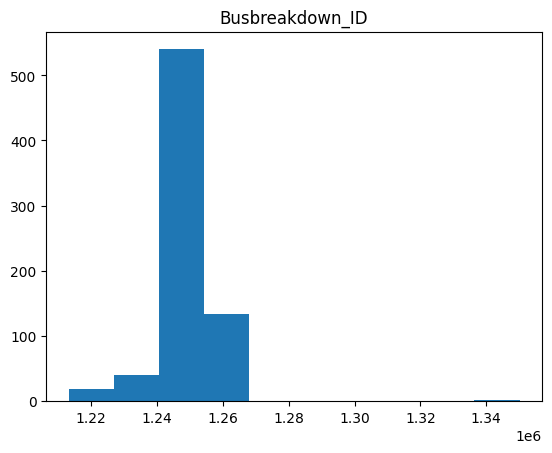

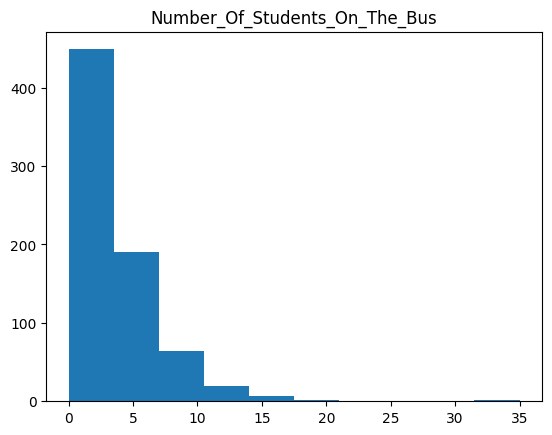

In [ ]:
for col in numerical_cols:
    plt.figure()
    plt.hist(df[col])
    plt.title(col)
    plt.show()

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns

In [ ]:
for col in categorical_cols:
    print(f"Value counts for {col}:")
    print(df[col].value_counts())
    print("\n")

Value counts for School_Year:
School_Year
2015-2016    731
2016-2017      1
Name: count, dtype: int64


Value counts for Run_Type:
Run_Type
Special Ed AM Run        596
Special Ed PM Run        120
General Ed PM Run          8
Project Read PM Run        4
General Ed AM Run          2
General Ed Field Trip      1
Project Read AM Run        1
Name: count, dtype: int64


Value counts for Bus_No:
Bus_No
1836       27
1802       20
1824       20
016306     12
1832       10
           ..
VN68134     1
1607        1
VN74640     1
1231        1
1451        1
Name: count, Length: 427, dtype: int64


Value counts for Route_Number:
Route_Number
L015    28
L016    22
L002    20
X876    13
L014    13
        ..
W798     1
M036     1
K169     1
Q481     1
M114     1
Name: count, Length: 349, dtype: int64


Value counts for Reason:
Reason
Heavy Traffic                  482
Other                           92
Accident                        70
Weather Conditions              25
Flat Tire               

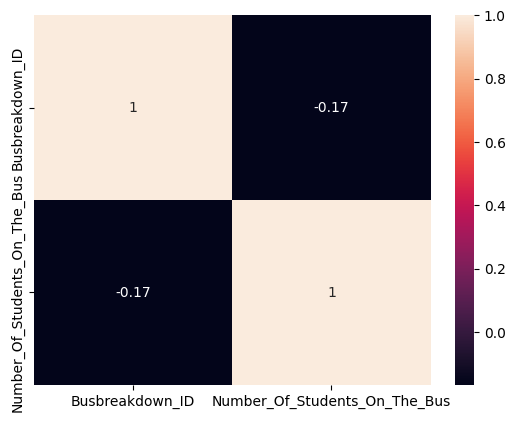

In [ ]:
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True)
plt.show()

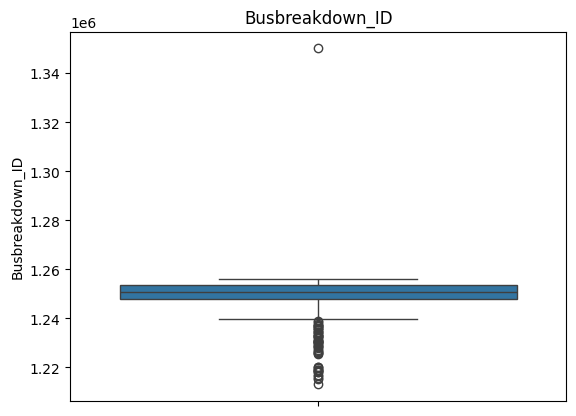

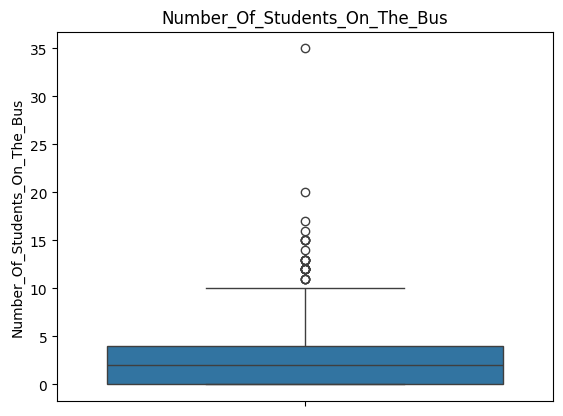

In [ ]:
for col in numerical_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(col)
    plt.show()

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

drop missing value

In [ ]:
df = df.dropna()

Encode Categorical Variables

One-hot encoding

In [ ]:
one_hot_encoded_data = pd.get_dummies(df, columns = ['Reason','Route_Number','How_Long_Delayed'])
print(one_hot_encoded_data)

      School_Year  Busbreakdown_ID           Run_Type  Bus_No  \
1375    2015-2016          1225377  Special Ed AM Run    1296   
1842    2015-2016          1216474  Special Ed PM Run   19340   
2587    2015-2016          1226096  Special Ed AM Run  GC0085   
3153    2015-2016          1226288  General Ed AM Run    5301   
3367    2015-2016          1213115  Special Ed AM Run  016303   
...           ...              ...                ...     ...   
36083   2015-2016          1256118  Special Ed AM Run    1314   
36102   2015-2016          1256140  Special Ed AM Run    1520   
36116   2015-2016          1256158  Special Ed AM Run    1427   
36122   2015-2016          1256165  Special Ed AM Run    1451   
36124   2015-2016          1256167  Special Ed AM Run    1640   

      Schools_Serviced             Occurred_On              Created_On  \
1375             25154  10/28/2015 06:25:00 AM  10/28/2015 06:31:00 AM   
1842             02347  09/21/2015 03:15:00 PM  09/21/2015 03:50:00 PM 

Label encoding

In [ ]:
le = LabelEncoder()
le.fit(["Boro", "Has_Contractor_Notified_Schools", "Has_Contractor_Notified_Parents", "Have_You_Alerted_OPT",'Breakdown_or_Running_Late','School_Age_or_PreK'])

LabelEncoder()

Scale and Normalize Data

In [ ]:
scaler = StandardScaler()
numerical_cols = ['Number_Of_Students_On_The_Bus']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

Feature Engineering

In [ ]:
# Copy the number of minutes from the text in the ['How_Long_Delayed'] column+convert them to integers,
# handling cases where the "minutes" bonus may not have a value of 0
df['Total_Delay_Minutes'] = df['How_Long_Delayed'].apply(lambda x: int(x.split('minutes')[0]) if 'minutes' in x else 0)

Handle Imbalanced Data

In [ ]:
print(y.unique())

['Running Late']


Handle Outliers

Remove Outliers from ['Number_Of_Students_On_The_Bus'} and i drop ['Busbreakdown_ID'] becuse i dont needed

بناء على الرسمة الي فوق باستخدام boxplot

In [ ]:
Q1 = df['Number_Of_Students_On_The_Bus'].quantile(0.25)
Q3 = df['Number_Of_Students_On_The_Bus'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Number_Of_Students_On_The_Bus'] >= lower_bound) & (df['Number_Of_Students_On_The_Bus'] <= upper_bound)]
df['Number_Of_Students_On_The_Bus'] = np.clip(df['Number_Of_Students_On_The_Bus'], lower_bound, upper_bound)


In [ ]:
df = df.drop('Busbreakdown_ID', axis=1)

Remove Duplicates


In [ ]:
df = df.drop_duplicates()

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

assume Breakdown_or_Running_Late as (Target Column)


In [ ]:
X= df.drop('Breakdown_or_Running_Late', axis=1)
y = df['Breakdown_or_Running_Late']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_valid = X_valid.apply(pd.to_numeric, errors='coerce')

## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [67]:
model = Sequential()
model.add(Dense(units=6, input_dim=X_train.shape[1], kernel_initializer='uniform',activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [68]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Training the Model
Train the ANN model using the training data.

In [70]:
# convert to numeric valu y_valid and y_train
y_train = y_train.replace({'Running Late': 1, 'On Time': 0})
y_valid = y_valid.replace({'Running Late': 1, 'On Time': 0})
X_train = X_train.fillna(0)
X_valid = X_valid.fillna(0)

history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_valid, y_valid))

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 1.0000 - loss: 0.6359 - val_accuracy: 1.0000 - val_loss: 0.6320
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6308 - val_accuracy: 1.0000 - val_loss: 0.6269
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6256 - val_accuracy: 1.0000 - val_loss: 0.6217
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.6204 - val_accuracy: 1.0000 - val_loss: 0.6165
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6152 - val_accuracy: 1.0000 - val_loss: 0.6113
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6100 - val_accuracy: 1.0000 - val_loss: 0.6060
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6047 - val_accuracy: 1.0000 - val_loss: 0.6008
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5995 - val_accuracy: 1.0000 - val_loss:

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [ ]:
model.evaluate(valid_Data)

## Make Predictions
Use the trained model to make predictions on new or unseen data.

## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

## Save the Model
Save the trained model for submission.

In [ ]:
model.save('my_model.h5')

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

1- First I started with a Boxplot to find the outliers I removed them from the ['Number_Of_Students_On_The_Bus'] column and made a drop of the
['Busbreakdown_ID'] in ML or AI it won't help me in prediction
Then I did this hot coding for columns that contain three or more values ​​to make it easier for the model to train and the rows contain two values i will but them in Label Encoding like True False to be 1 0

2-Based on the data I have, I need Ann. I chose it to be Sequential, one after the other. I put two layers with Relu selected to make it non-linear. In addition to the last layer, I chose activation sigmoid becuse my task is to predict whether the bus was delayed or had a breakdown which mean Binary When compiling the model, I chose Adam Optimizer because it combines the best two algorithms. It is the best type for measuring loss function and of course the accuracy for testing the results and whether there is improvement or not.

I'm sorry but I couldn't finish the all )::

### Answer Here: